<a href="https://colab.research.google.com/github/elsaimo/4105-project/blob/main/mohamed4105projectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Create 'temp' directory if it doesn't exist
os.makedirs('temp', exist_ok=True)

# Mount Google Drive
drive.mount('/content/drive')

# Load the train dataset
file_path = '/content/sample_data/house-train_1.csv'
df_train = pd.read_csv(file_path)

# Display the first few rows of the dataset
#print(df_train.head())

# Features used for modeling
useful_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
               'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
               'LotFrontage', 'WoodDeckSF', 'OpenPorchSF',
               'ExterQual', 'Neighborhood', 'MSZoning',
               'Alley', 'LotShape', 'LandContour', 'Condition1', 'HouseStyle', 'MasVnrType', 'SaleCondition', 'SalePrice']

df_train_prepro = df_train[useful_cols].copy()

# Remove Nulls
df_train_prepro['GarageArea'] = df_train_prepro['GarageArea'].fillna(df_train_prepro['GarageArea'].mean())
df_train_prepro['TotalBsmtSF'] = df_train_prepro['TotalBsmtSF'].fillna(df_train_prepro['TotalBsmtSF'].mean())

# Convert all columns to numeric (float) and handle NaN values
df_train_prepro = df_train_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)
print(df_train_prepro.head())

# Save the DataFrame to a CSV file
output_file = 'temp/housing_df_train_prepro.csv'
df_train_prepro.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   YearRemodAdd  Fireplaces  LotFrontage  WoodDeckSF  ...  Neighborhood  \
0          2003           0         65.0           0  ...           0.0   
1          1976           1         80.0         298  ...           0.0   
2          2002           1         68.0           0  ...           0.0   
3          1970           1         60.0           0  ...           0.0   
4          2000           1         84.0     

**Housing Regression**

Epoch[1/20], Train Loss: 131919317861.6986, Validation Loss: 36329736079.7808, Validation RMSE: 190603.6098
Epoch[2/20], Train Loss: 33509485638.1370, Validation Loss: 32325368172.7123, Validation RMSE: 179792.5698
Epoch[3/20], Train Loss: 29716225374.6849, Validation Loss: 28880162170.7397, Validation RMSE: 169941.6434
Epoch[4/20], Train Loss: 26450220887.6712, Validation Loss: 25915183637.0411, Validation RMSE: 160981.9357
Epoch[5/20], Train Loss: 23634070037.0411, Validation Loss: 23351030966.3562, Validation RMSE: 152810.4413
Epoch[6/20], Train Loss: 21196466190.0274, Validation Loss: 21152641234.4110, Validation RMSE: 145439.4762
Epoch[7/20], Train Loss: 19102382641.0959, Validation Loss: 19251133468.0548, Validation RMSE: 138748.4539
Epoch[8/20], Train Loss: 17288799891.2877, Validation Loss: 17622640541.8082, Validation RMSE: 132750.2939
Epoch[9/20], Train Loss: 15733145179.1781, Validation Loss: 16217241109.0411, Validation RMSE: 127346.9321
Epoch[10/20], Train Loss: 1438684897

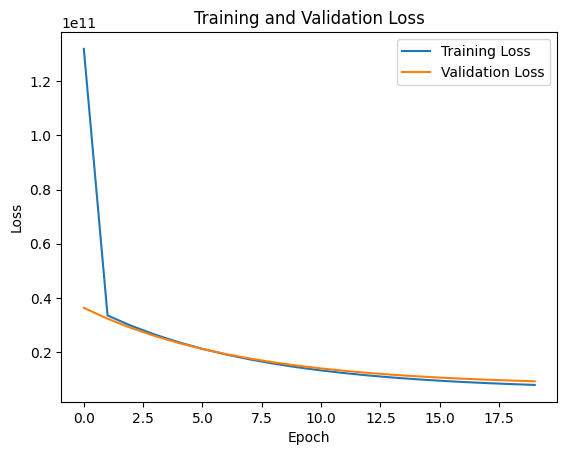

Final Validation RMSE: 96092.9784
Final Validation R-squared: -0.2038
Number of parameters in the model: 21041


In [30]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the preprocessed housing dataset
df_train_prepro = pd.read_csv('/content/temp/housing_df_train_prepro.csv')

# Extract features and target variable
X = df_train_prepro.drop(['SalePrice'], axis=1).values
y = df_train_prepro['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 500)
        self.fc2 = nn.Linear(500, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')

In [34]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Create 'temp' directory if it doesn't exist
os.makedirs('temp', exist_ok=True)

# Mount Google Drive
drive.mount('/content/drive')

# Load the train dataset
file_path = '/content/sample_data/house-train_1.csv'
df_train = pd.read_csv(file_path)

# Display the first few rows of the test dataset
#df_train.head()

# Features used for modeling
useful_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
               'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
               'LotFrontage', 'WoodDeckSF', 'OpenPorchSF',
               'ExterQual', 'Neighborhood', 'MSZoning',
               'Alley', 'LotShape', 'LandContour', 'Condition1', 'HouseStyle', 'MasVnrType', 'SaleCondition', 'SalePrice']

df_train_encode = df_train[useful_cols].copy()

# Remove Nulls
df_train_encode['GarageArea'] = df_train_encode['GarageArea'].fillna(df_train_encode['GarageArea'].mean())
df_train_encode['TotalBsmtSF'] = df_train_encode['TotalBsmtSF'].fillna(df_train_encode['TotalBsmtSF'].mean())

# One-hot encoding
df_train_encode = pd.get_dummies(df_train_encode,
                                 columns=['Neighborhood', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Condition1',
                                          'HouseStyle', 'MasVnrType', 'SaleCondition'])

# Replace boolean values with 1 and 0
df_train_encode = df_train_encode.replace({True: 1, False: 0})

# Convert all columns to numeric (float) and handle NaN values
df_train_encode = df_train_encode.apply(pd.to_numeric, errors='coerce').fillna(0)
print(df_train_encode.head())

# Save the DataFrame to a CSV file
output_file = 'temp/housing_df_train_encode.csv'
df_train_encode.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   OverallQual  GrLivArea  GarageArea  TotalBsmtSF  FullBath  YearBuilt  \
0            7       1710         548          856         2       2003   
1            6       1262         460         1262         2       1976   
2            7       1786         608          920         2       2001   
3            7       1717         642          756         1       1915   
4            8       2198         836         1145         2       2000   

   YearRemodAdd  Fireplaces  LotFrontage  WoodDeckSF  ...  HouseStyle_SLvl  \
0          2003           0         65.0           0  ...                0   
1          1976           1         80.0         298  ...                0   
2          2002           1         68.0           0  ...                0   
3          1970           1         60.0           0  ...                0   
4          2000           1   

**Housing Regression On-Hot Ecnoding**

Epoch[1/20], Train Loss: 41007306331.1781, Validation Loss: 35524802251.3973, Validation RMSE: 188480.2437
Epoch[2/20], Train Loss: 32747974094.9041, Validation Loss: 31636224533.0411, Validation RMSE: 177865.7486
Epoch[3/20], Train Loss: 29063588737.7534, Validation Loss: 28279531323.6164, Validation RMSE: 168165.1906
Epoch[4/20], Train Loss: 25880553920.8767, Validation Loss: 25400410420.6027, Validation RMSE: 159375.0621
Epoch[5/20], Train Loss: 23146272599.6712, Validation Loss: 22914280896.8767, Validation RMSE: 151374.6376
Epoch[6/20], Train Loss: 20780720941.5890, Validation Loss: 20769096213.0411, Validation RMSE: 144114.8716
Epoch[7/20], Train Loss: 18737535761.5342, Validation Loss: 18930647404.7123, Validation RMSE: 137588.6892
Epoch[8/20], Train Loss: 16983331503.3425, Validation Loss: 17346084387.0685, Validation RMSE: 131704.5344
Epoch[9/20], Train Loss: 15468386780.9315, Validation Loss: 15977597517.1507, Validation RMSE: 126402.5218
Epoch[10/20], Train Loss: 14157304916

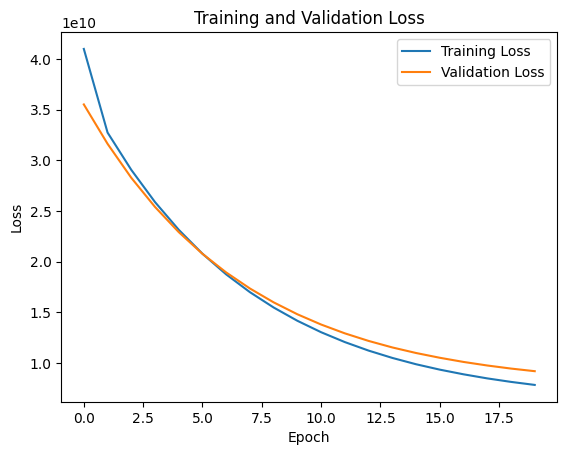

Final Validation RMSE: 95819.1214
Final Validation R-squared: -0.1970
Number of parameters in the model: 49541


In [35]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the encoded housing dataset
df_train_encode = pd.read_csv('temp/housing_df_train_encode.csv')

# Extract features and target variable
X = df_train_encode.drop(['SalePrice'], axis=1).values
y = df_train_encode['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 500)
        self.fc2 = nn.Linear(500, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')

**Housing Regression On-Hot Encoding (Decreased Width)**

Epoch[1/20], Train Loss: 1210118449185217.0000, Validation Loss: 17388374478.9041, Validation RMSE: 131864.9858
Epoch[2/20], Train Loss: 99349658918.5753, Validation Loss: 16130393635.0685, Validation RMSE: 127005.4866
Epoch[3/20], Train Loss: 14304075032.5479, Validation Loss: 14936034135.6712, Validation RMSE: 122213.0686
Epoch[4/20], Train Loss: 13157669214.6849, Validation Loss: 13901920725.9178, Validation RMSE: 117906.4066
Epoch[5/20], Train Loss: 12163231982.4658, Validation Loss: 13016593232.6575, Validation RMSE: 114090.2854
Epoch[6/20], Train Loss: 11309708259.9452, Validation Loss: 12253670603.3973, Validation RMSE: 110696.2990
Epoch[7/20], Train Loss: 10572355022.9041, Validation Loss: 11603174673.5342, Validation RMSE: 107718.0332
Epoch[8/20], Train Loss: 9942102934.7945, Validation Loss: 11038541157.6986, Validation RMSE: 105064.4619
Epoch[9/20], Train Loss: 9392655661.5890, Validation Loss: 10556557613.5890, Validation RMSE: 102745.1099
Epoch[10/20], Train Loss: 89225641

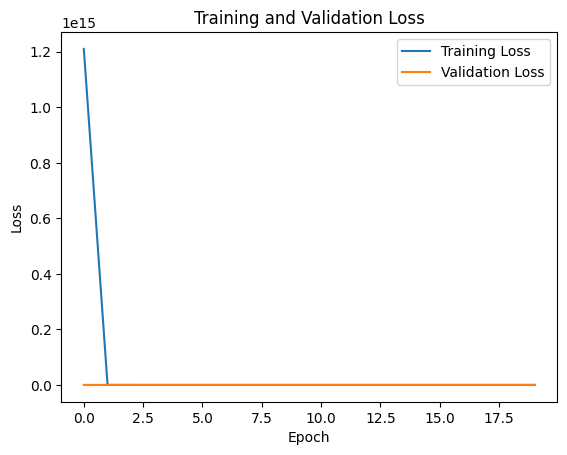

Final Validation RMSE: 90389.0596
Final Validation R-squared: -0.0652
Number of parameters in the model: 36001


In [36]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the encoded housing dataset
df_train_encode = pd.read_csv('temp/housing_df_train_encode.csv')

# Extract features and target variable
X = df_train_encode.drop(['SalePrice'], axis=1).values
y = df_train_encode['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')

**Housing Regression One-Hot Encoding (Increased Depth)**

Epoch[1/20], Train Loss: 27469371209307.1797, Validation Loss: 54901567768.5479, Validation RMSE: 234310.8358
Epoch[2/20], Train Loss: 51054418284.7123, Validation Loss: 48327112451.5069, Validation RMSE: 219834.2841
Epoch[3/20], Train Loss: 44850088020.1644, Validation Loss: 42657026440.7671, Validation RMSE: 206535.7752
Epoch[4/20], Train Loss: 39493765091.9452, Validation Loss: 37774180015.3425, Validation RMSE: 194355.8078
Epoch[5/20], Train Loss: 34875184731.1781, Validation Loss: 33563700350.2466, Validation RMSE: 183203.9856
Epoch[6/20], Train Loss: 30889776113.9726, Validation Loss: 29942615166.2466, Validation RMSE: 173039.3457
Epoch[7/20], Train Loss: 27457748823.6712, Validation Loss: 26826647860.6027, Validation RMSE: 163788.4241
Epoch[8/20], Train Loss: 24499631679.1233, Validation Loss: 24137339833.8630, Validation RMSE: 155361.9639
Epoch[9/20], Train Loss: 21944183120.6575, Validation Loss: 21816661973.9178, Validation RMSE: 147704.6444
Epoch[10/20], Train Loss: 19735360

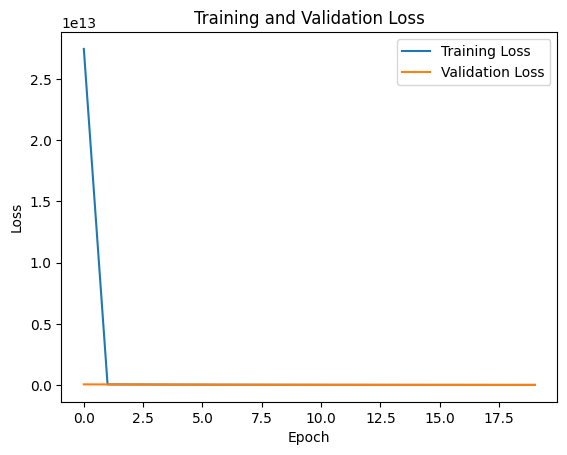

Final Validation RMSE: 101445.1239
Final Validation R-squared: -0.3417
Number of parameters in the model: 91641


In [41]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load the encoded housing dataset
df_train_encode = pd.read_csv('/content/temp/housing_df_train_encode.csv')

# Extract features and target variable
X = df_train_encode.drop(['SalePrice'], axis=1).values
y = df_train_encode['SalePrice'].values

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

# Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 500)
        self.fc2 = nn.Linear(500, 100)
        self.fc3 = nn.Linear(100, 20)
        self.fc4 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.view(-1, 1))  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets.view(-1, 1)) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('temp/regression_loss_plot.png')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

# Calculate R-squared for final validation predictions
model.eval()
with torch.no_grad():
    final_val_predictions = model(X_val_tensor)
r_squared = 1 - (val_loss / np.var(y_val))
print(f'Final Validation R-squared: {r_squared:.4f}')

# Display the number of parameters in the model
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters in the model: {num_params}')